Part I)    Perceptrons by hand

II) Part 2: Rosenblatt’s Algorithm


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston

In [22]:
boston = load_boston()

In [23]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [24]:
df = pd.DataFrame(boston.data, columns = boston['feature_names'])

In [25]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
df['MEDV'] = boston.target

In [27]:
df['highPriced'] = df['MEDV'] > 40

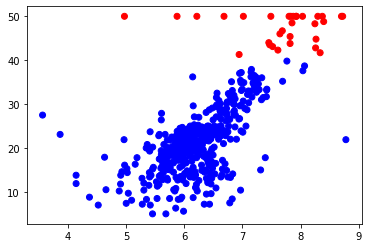

In [28]:
plt.scatter(df['RM'], df['MEDV'], c = df['highPriced'].map({True: 'red', False: 'blue'}))

As we can observe form this plot, the data for RM and MEDV is linearly seperable using a line with almost parallel to the x-axis

In [29]:
X = np.ones((len(df),3))
X[:, 1:] = df[['RM', 'MEDV']].values
X

array([[ 1.   ,  6.575, 24.   ],
       [ 1.   ,  6.421, 21.6  ],
       [ 1.   ,  7.185, 34.7  ],
       ...,
       [ 1.   ,  6.976, 23.9  ],
       [ 1.   ,  6.794, 22.   ],
       [ 1.   ,  6.03 , 11.9  ]])

In [30]:
X.shape

(506, 3)

In [31]:
y = df['highPriced'].values
y.astype(int)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
def z(X,weights):
        w = weights.T
        z = np.dot(X,w)
        return z
   

     
def predict(X):
        #Heaviside function. Returns 1 or 0 
        return np.where(z(X,weights) >= 0,0,0)

    
def myPerceptron(X,y,step,weights):
            
            errors = 0
            errors_count = []
            for X, y in zip(X, y):
                y_hat = predict(X)
                #calculte the delta
                w_delta = step*(y - y_hat)
                #update all the weights but the bias
                weights[1:] +=   w_delta * X
                #for the bias delta*1 = delta
                weights[0] = weights[0] + w_delta
                #if there is an error, increase the error count for the batch
                errors += int(w_delta != 0.0)
            #add the error count of the batch to the errors variable
            errors_count.append(errors) 
            print(errors_count)
            print(weights)
            return weights, errors
        

In [33]:
import random
random.seed(100)
step = 0.0001
weights = np.random.rand(X.shape[1])
step,weights

weights = weights.reshape((1, 3))
weights.shape
y = y.reshape((506,1))

In [34]:
weights, errors = myPerceptron(X, y,step,weights)

[31]
[[0.42678856 0.021451   0.37872032]]


In [ ]:
errors = 1
while errors > 0:
    weights, errors = myPerceptron(X, y,step,weights)
else:
    print("Convergence")

[31]
[[0.42988856 0.024551   0.38182032]]
[31]
[[0.43298856 0.027651   0.38492032]]
[31]
[[0.43608856 0.030751   0.38802032]]
[31]
[[0.43918856 0.033851   0.39112032]]
[31]
[[0.44228856 0.036951   0.39422032]]
[31]
[[0.44538856 0.040051   0.39732032]]
[31]
[[0.44848856 0.043151   0.40042032]]
[31]
[[0.45158856 0.046251   0.40352032]]
[31]
[[0.45468856 0.049351   0.40662032]]
[31]
[[0.45778856 0.052451   0.40972032]]
[31]
[[0.46088856 0.055551   0.41282032]]
[31]
[[0.46398856 0.058651   0.41592032]]
[31]
[[0.46708856 0.061751   0.41902032]]
[31]
[[0.47018856 0.064851   0.42212032]]
[31]
[[0.47328856 0.067951   0.42522032]]
[31]
[[0.47638856 0.071051   0.42832032]]
[31]
[[0.47948856 0.074151   0.43142032]]
[31]
[[0.48258856 0.077251   0.43452032]]
[31]
[[0.48568856 0.080351   0.43762032]]
[31]
[[0.48878856 0.083451   0.44072032]]
[31]
[[0.49188856 0.086551   0.44382032]]
[31]
[[0.49498856 0.089651   0.44692032]]
[31]
[[0.49808856 0.092751   0.45002032]]
[31]
[[0.50118856 0.095851   0.453

[31]
[[1.12118856 0.715851   1.07312032]]
[31]
[[1.12428856 0.718951   1.07622032]]
[31]
[[1.12738856 0.722051   1.07932032]]
[31]
[[1.13048856 0.725151   1.08242032]]
[31]
[[1.13358856 0.728251   1.08552032]]
[31]
[[1.13668856 0.731351   1.08862032]]
[31]
[[1.13978856 0.734451   1.09172032]]
[31]
[[1.14288856 0.737551   1.09482032]]
[31]
[[1.14598856 0.740651   1.09792032]]
[31]
[[1.14908856 0.743751   1.10102032]]
[31]
[[1.15218856 0.746851   1.10412032]]
[31]
[[1.15528856 0.749951   1.10722032]]
[31]
[[1.15838856 0.753051   1.11032032]]
[31]
[[1.16148856 0.756151   1.11342032]]
[31]
[[1.16458856 0.759251   1.11652032]]
[31]
[[1.16768856 0.762351   1.11962032]]
[31]
[[1.17078856 0.765451   1.12272032]]
[31]
[[1.17388856 0.768551   1.12582032]]
[31]
[[1.17698856 0.771651   1.12892032]]
[31]
[[1.18008856 0.774751   1.13202032]]
[31]
[[1.18318856 0.777851   1.13512032]]
[31]
[[1.18628856 0.780951   1.13822032]]
[31]
[[1.18938856 0.784051   1.14132032]]
[31]
[[1.19248856 0.787151   1.144

[31]
[[1.73188856 1.326551   1.68382032]]
[31]
[[1.73498856 1.329651   1.68692032]]
[31]
[[1.73808856 1.332751   1.69002032]]
[31]
[[1.74118856 1.335851   1.69312032]]
[31]
[[1.74428856 1.338951   1.69622032]]
[31]
[[1.74738856 1.342051   1.69932032]]
[31]
[[1.75048856 1.345151   1.70242032]]
[31]
[[1.75358856 1.348251   1.70552032]]
[31]
[[1.75668856 1.351351   1.70862032]]
[31]
[[1.75978856 1.354451   1.71172032]]
[31]
[[1.76288856 1.357551   1.71482032]]
[31]
[[1.76598856 1.360651   1.71792032]]
[31]
[[1.76908856 1.363751   1.72102032]]
[31]
[[1.77218856 1.366851   1.72412032]]
[31]
[[1.77528856 1.369951   1.72722032]]
[31]
[[1.77838856 1.373051   1.73032032]]
[31]
[[1.78148856 1.376151   1.73342032]]
[31]
[[1.78458856 1.379251   1.73652032]]
[31]
[[1.78768856 1.382351   1.73962032]]
[31]
[[1.79078856 1.385451   1.74272032]]
[31]
[[1.79388856 1.388551   1.74582032]]
[31]
[[1.79698856 1.391651   1.74892032]]
[31]
[[1.80008856 1.394751   1.75202032]]
[31]
[[1.80318856 1.397851   1.755

[31]
[[2.33948856 1.934151   2.29142032]]
[31]
[[2.34258856 1.937251   2.29452032]]
[31]
[[2.34568856 1.940351   2.29762032]]
[31]
[[2.34878856 1.943451   2.30072032]]
[31]
[[2.35188856 1.946551   2.30382032]]
[31]
[[2.35498856 1.949651   2.30692032]]
[31]
[[2.35808856 1.952751   2.31002032]]
[31]
[[2.36118856 1.955851   2.31312032]]
[31]
[[2.36428856 1.958951   2.31622032]]
[31]
[[2.36738856 1.962051   2.31932032]]
[31]
[[2.37048856 1.965151   2.32242032]]
[31]
[[2.37358856 1.968251   2.32552032]]
[31]
[[2.37668856 1.971351   2.32862032]]
[31]
[[2.37978856 1.974451   2.33172032]]
[31]
[[2.38288856 1.977551   2.33482032]]
[31]
[[2.38598856 1.980651   2.33792032]]
[31]
[[2.38908856 1.983751   2.34102032]]
[31]
[[2.39218856 1.986851   2.34412032]]
[31]
[[2.39528856 1.989951   2.34722032]]
[31]
[[2.39838856 1.993051   2.35032032]]
[31]
[[2.40148856 1.996151   2.35342032]]
[31]
[[2.40458856 1.999251   2.35652032]]
[31]
[[2.40768856 2.002351   2.35962032]]
[31]
[[2.41078856 2.005451   2.362

[31]
[[3.00908856 2.603751   2.96102032]]
[31]
[[3.01218856 2.606851   2.96412032]]
[31]
[[3.01528856 2.609951   2.96722032]]
[31]
[[3.01838856 2.613051   2.97032032]]
[31]
[[3.02148856 2.616151   2.97342032]]
[31]
[[3.02458856 2.619251   2.97652032]]
[31]
[[3.02768856 2.622351   2.97962032]]
[31]
[[3.03078856 2.625451   2.98272032]]
[31]
[[3.03388856 2.628551   2.98582032]]
[31]
[[3.03698856 2.631651   2.98892032]]
[31]
[[3.04008856 2.634751   2.99202032]]
[31]
[[3.04318856 2.637851   2.99512032]]
[31]
[[3.04628856 2.640951   2.99822032]]
[31]
[[3.04938856 2.644051   3.00132032]]
[31]
[[3.05248856 2.647151   3.00442032]]
[31]
[[3.05558856 2.650251   3.00752032]]
[31]
[[3.05868856 2.653351   3.01062032]]
[31]
[[3.06178856 2.656451   3.01372032]]
[31]
[[3.06488856 2.659551   3.01682032]]
[31]
[[3.06798856 2.662651   3.01992032]]
[31]
[[3.07108856 2.665751   3.02302032]]
[31]
[[3.07418856 2.668851   3.02612032]]
[31]
[[3.07728856 2.671951   3.02922032]]
[31]
[[3.08038856 2.675051   3.032

[31]
[[3.61668856 3.211351   3.56862032]]
[31]
[[3.61978856 3.214451   3.57172032]]
[31]
[[3.62288856 3.217551   3.57482032]]
[31]
[[3.62598856 3.220651   3.57792032]]
[31]
[[3.62908856 3.223751   3.58102032]]
[31]
[[3.63218856 3.226851   3.58412032]]
[31]
[[3.63528856 3.229951   3.58722032]]
[31]
[[3.63838856 3.233051   3.59032032]]
[31]
[[3.64148856 3.236151   3.59342032]]
[31]
[[3.64458856 3.239251   3.59652032]]
[31]
[[3.64768856 3.242351   3.59962032]]
[31]
[[3.65078856 3.245451   3.60272032]]
[31]
[[3.65388856 3.248551   3.60582032]]
[31]
[[3.65698856 3.251651   3.60892032]]
[31]
[[3.66008856 3.254751   3.61202032]]
[31]
[[3.66318856 3.257851   3.61512032]]
[31]
[[3.66628856 3.260951   3.61822032]]
[31]
[[3.66938856 3.264051   3.62132032]]
[31]
[[3.67248856 3.267151   3.62442032]]
[31]
[[3.67558856 3.270251   3.62752032]]
[31]
[[3.67868856 3.273351   3.63062032]]
[31]
[[3.68178856 3.276451   3.63372032]]
[31]
[[3.68488856 3.279551   3.63682032]]
[31]
[[3.68798856 3.282651   3.639

[31]
[[4.22738856 3.822051   4.17932032]]
[31]
[[4.23048856 3.825151   4.18242032]]
[31]
[[4.23358856 3.828251   4.18552032]]
[31]
[[4.23668856 3.831351   4.18862032]]
[31]
[[4.23978856 3.834451   4.19172032]]
[31]
[[4.24288856 3.837551   4.19482032]]
[31]
[[4.24598856 3.840651   4.19792032]]
[31]
[[4.24908856 3.843751   4.20102032]]
[31]
[[4.25218856 3.846851   4.20412032]]
[31]
[[4.25528856 3.849951   4.20722032]]
[31]
[[4.25838856 3.853051   4.21032032]]
[31]
[[4.26148856 3.856151   4.21342032]]
[31]
[[4.26458856 3.859251   4.21652032]]
[31]
[[4.26768856 3.862351   4.21962032]]
[31]
[[4.27078856 3.865451   4.22272032]]
[31]
[[4.27388856 3.868551   4.22582032]]
[31]
[[4.27698856 3.871651   4.22892032]]
[31]
[[4.28008856 3.874751   4.23202032]]
[31]
[[4.28318856 3.877851   4.23512032]]
[31]
[[4.28628856 3.880951   4.23822032]]
[31]
[[4.28938856 3.884051   4.24132032]]
[31]
[[4.29248856 3.887151   4.24442032]]
[31]
[[4.29558856 3.890251   4.24752032]]
[31]
[[4.29868856 3.893351   4.250

[31]
[[4.89388856 4.488551   4.84582032]]
[31]
[[4.89698856 4.491651   4.84892032]]
[31]
[[4.90008856 4.494751   4.85202032]]
[31]
[[4.90318856 4.497851   4.85512032]]
[31]
[[4.90628856 4.500951   4.85822032]]
[31]
[[4.90938856 4.504051   4.86132032]]
[31]
[[4.91248856 4.507151   4.86442032]]
[31]
[[4.91558856 4.510251   4.86752032]]
[31]
[[4.91868856 4.513351   4.87062032]]
[31]
[[4.92178856 4.516451   4.87372032]]
[31]
[[4.92488856 4.519551   4.87682032]]
[31]
[[4.92798856 4.522651   4.87992032]]
[31]
[[4.93108856 4.525751   4.88302032]]
[31]
[[4.93418856 4.528851   4.88612032]]
[31]
[[4.93728856 4.531951   4.88922032]]
[31]
[[4.94038856 4.535051   4.89232032]]
[31]
[[4.94348856 4.538151   4.89542032]]
[31]
[[4.94658856 4.541251   4.89852032]]
[31]
[[4.94968856 4.544351   4.90162032]]
[31]
[[4.95278856 4.547451   4.90472032]]
[31]
[[4.95588856 4.550551   4.90782032]]
[31]
[[4.95898856 4.553651   4.91092032]]
[31]
[[4.96208856 4.556751   4.91402032]]
[31]
[[4.96518856 4.559851   4.917

[31]
[[5.56348856 5.158151   5.51542032]]
[31]
[[5.56658856 5.161251   5.51852032]]
[31]
[[5.56968856 5.164351   5.52162032]]
[31]
[[5.57278856 5.167451   5.52472032]]
[31]
[[5.57588856 5.170551   5.52782032]]
[31]
[[5.57898856 5.173651   5.53092032]]
[31]
[[5.58208856 5.176751   5.53402032]]
[31]
[[5.58518856 5.179851   5.53712032]]
[31]
[[5.58828856 5.182951   5.54022032]]
[31]
[[5.59138856 5.186051   5.54332032]]
[31]
[[5.59448856 5.189151   5.54642032]]
[31]
[[5.59758856 5.192251   5.54952032]]
[31]
[[5.60068856 5.195351   5.55262032]]
[31]
[[5.60378856 5.198451   5.55572032]]
[31]
[[5.60688856 5.201551   5.55882032]]
[31]
[[5.60998856 5.204651   5.56192032]]
[31]
[[5.61308856 5.207751   5.56502032]]
[31]
[[5.61618856 5.210851   5.56812032]]
[31]
[[5.61928856 5.213951   5.57122032]]
[31]
[[5.62238856 5.217051   5.57432032]]
[31]
[[5.62548856 5.220151   5.57742032]]
[31]
[[5.62858856 5.223251   5.58052032]]
[31]
[[5.63168856 5.226351   5.58362032]]
[31]
[[5.63478856 5.229451   5.586

[31]
[[6.25478856 5.849451   6.20672032]]
[31]
[[6.25788856 5.852551   6.20982032]]
[31]
[[6.26098856 5.855651   6.21292032]]
[31]
[[6.26408856 5.858751   6.21602032]]
[31]
[[6.26718856 5.861851   6.21912032]]
[31]
[[6.27028856 5.864951   6.22222032]]
[31]
[[6.27338856 5.868051   6.22532032]]
[31]
[[6.27648856 5.871151   6.22842032]]
[31]
[[6.27958856 5.874251   6.23152032]]
[31]
[[6.28268856 5.877351   6.23462032]]
[31]
[[6.28578856 5.880451   6.23772032]]
[31]
[[6.28888856 5.883551   6.24082032]]
[31]
[[6.29198856 5.886651   6.24392032]]
[31]
[[6.29508856 5.889751   6.24702032]]
[31]
[[6.29818856 5.892851   6.25012032]]
[31]
[[6.30128856 5.895951   6.25322032]]
[31]
[[6.30438856 5.899051   6.25632032]]
[31]
[[6.30748856 5.902151   6.25942032]]
[31]
[[6.31058856 5.905251   6.26252032]]
[31]
[[6.31368856 5.908351   6.26562032]]
[31]
[[6.31678856 5.911451   6.26872032]]
[31]
[[6.31988856 5.914551   6.27182032]]
[31]
[[6.32298856 5.917651   6.27492032]]
[31]
[[6.32608856 5.920751   6.278

[31]
[[6.93368856 6.528351   6.88562032]]
[31]
[[6.93678856 6.531451   6.88872032]]
[31]
[[6.93988856 6.534551   6.89182032]]
[31]
[[6.94298856 6.537651   6.89492032]]
[31]
[[6.94608856 6.540751   6.89802032]]
[31]
[[6.94918856 6.543851   6.90112032]]
[31]
[[6.95228856 6.546951   6.90422032]]
[31]
[[6.95538856 6.550051   6.90732032]]
[31]
[[6.95848856 6.553151   6.91042032]]
[31]
[[6.96158856 6.556251   6.91352032]]
[31]
[[6.96468856 6.559351   6.91662032]]
[31]
[[6.96778856 6.562451   6.91972032]]
[31]
[[6.97088856 6.565551   6.92282032]]
[31]
[[6.97398856 6.568651   6.92592032]]
[31]
[[6.97708856 6.571751   6.92902032]]
[31]
[[6.98018856 6.574851   6.93212032]]
[31]
[[6.98328856 6.577951   6.93522032]]
[31]
[[6.98638856 6.581051   6.93832032]]
[31]
[[6.98948856 6.584151   6.94142032]]
[31]
[[6.99258856 6.587251   6.94452032]]
[31]
[[6.99568856 6.590351   6.94762032]]
[31]
[[6.99878856 6.593451   6.95072032]]
[31]
[[7.00188856 6.596551   6.95382032]]
[31]
[[7.00498856 6.599651   6.956

[31]
[[7.60638856 7.201051   7.55832032]]
[31]
[[7.60948856 7.204151   7.56142032]]
[31]
[[7.61258856 7.207251   7.56452032]]
[31]
[[7.61568856 7.210351   7.56762032]]
[31]
[[7.61878856 7.213451   7.57072032]]
[31]
[[7.62188856 7.216551   7.57382032]]
[31]
[[7.62498856 7.219651   7.57692032]]
[31]
[[7.62808856 7.222751   7.58002032]]
[31]
[[7.63118856 7.225851   7.58312032]]
[31]
[[7.63428856 7.228951   7.58622032]]
[31]
[[7.63738856 7.232051   7.58932032]]
[31]
[[7.64048856 7.235151   7.59242032]]
[31]
[[7.64358856 7.238251   7.59552032]]
[31]
[[7.64668856 7.241351   7.59862032]]
[31]
[[7.64978856 7.244451   7.60172032]]
[31]
[[7.65288856 7.247551   7.60482032]]
[31]
[[7.65598856 7.250651   7.60792032]]
[31]
[[7.65908856 7.253751   7.61102032]]
[31]
[[7.66218856 7.256851   7.61412032]]
[31]
[[7.66528856 7.259951   7.61722032]]
[31]
[[7.66838856 7.263051   7.62032032]]
[31]
[[7.67148856 7.266151   7.62342032]]
[31]
[[7.67458856 7.269251   7.62652032]]
[31]
[[7.67768856 7.272351   7.629

[31]
[[8.21398856 7.808651   8.16592032]]
[31]
[[8.21708856 7.811751   8.16902032]]
[31]
[[8.22018856 7.814851   8.17212032]]
[31]
[[8.22328856 7.817951   8.17522032]]
[31]
[[8.22638856 7.821051   8.17832032]]
[31]
[[8.22948856 7.824151   8.18142032]]
[31]
[[8.23258856 7.827251   8.18452032]]
[31]
[[8.23568856 7.830351   8.18762032]]
[31]
[[8.23878856 7.833451   8.19072032]]
[31]
[[8.24188856 7.836551   8.19382032]]
[31]
[[8.24498856 7.839651   8.19692032]]
[31]
[[8.24808856 7.842751   8.20002032]]
[31]
[[8.25118856 7.845851   8.20312032]]
[31]
[[8.25428856 7.848951   8.20622032]]
[31]
[[8.25738856 7.852051   8.20932032]]
[31]
[[8.26048856 7.855151   8.21242032]]
[31]
[[8.26358856 7.858251   8.21552032]]
[31]
[[8.26668856 7.861351   8.21862032]]
[31]
[[8.26978856 7.864451   8.22172032]]
[31]
[[8.27288856 7.867551   8.22482032]]
[31]
[[8.27598856 7.870651   8.22792032]]
[31]
[[8.27908856 7.873751   8.23102032]]
[31]
[[8.28218856 7.876851   8.23412032]]
[31]
[[8.28528856 7.879951   8.237

[31]
[[8.82468856 8.419351   8.77662032]]
[31]
[[8.82778856 8.422451   8.77972032]]
[31]
[[8.83088856 8.425551   8.78282032]]
[31]
[[8.83398856 8.428651   8.78592032]]
[31]
[[8.83708856 8.431751   8.78902032]]
[31]
[[8.84018856 8.434851   8.79212032]]
[31]
[[8.84328856 8.437951   8.79522032]]
[31]
[[8.84638856 8.441051   8.79832032]]
[31]
[[8.84948856 8.444151   8.80142032]]
[31]
[[8.85258856 8.447251   8.80452032]]
[31]
[[8.85568856 8.450351   8.80762032]]
[31]
[[8.85878856 8.453451   8.81072032]]
[31]
[[8.86188856 8.456551   8.81382032]]
[31]
[[8.86498856 8.459651   8.81692032]]
[31]
[[8.86808856 8.462751   8.82002032]]
[31]
[[8.87118856 8.465851   8.82312032]]
[31]
[[8.87428856 8.468951   8.82622032]]
[31]
[[8.87738856 8.472051   8.82932032]]
[31]
[[8.88048856 8.475151   8.83242032]]
[31]
[[8.88358856 8.478251   8.83552032]]
[31]
[[8.88668856 8.481351   8.83862032]]
[31]
[[8.88978856 8.484451   8.84172032]]
[31]
[[8.89288856 8.487551   8.84482032]]
[31]
[[8.89598856 8.490651   8.847

In [ ]:
def perceptron(X,y, num_iter,step,w):
    features = X
    labels = y
    
    # set weights and bias to 0
   
    bias = 0
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label - target)*step
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
                w[0] += delta
        
        misclassified_.append(misclassified)
        
    return (w, misclassified_)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
w = np.random.rand(X.shape[1])             
num_iter = 1
step = 0.01
#misclassified = 1
while (misclassified) > 0:
    w, misclassified_ = perceptron(X,y, num_iter,step,w)
else:
    print("Done")


In [ ]:
w = np.random.rand(X.shape[1])             
num_iter = 2
step = 0.1
w, misclassified_ = perceptron(X,y, num_iter,step,w)
print(misclassified_)